# Visualizing 'grands sites' of the French region Occitanie (Maps)

#### Open data files (incl. geojson) can be found here: https://www.data.gouv.fr/fr/datasets/5daa56aa06e3e7551e29a305/

In [1]:
%matplotlib inline
%load_ext lab_black

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import textwrap
import seaborn as sns
import geopandas as gpd
from descartes import PolygonPatch
from ipyleaflet import Map, basemaps, basemap_to_tiles, GeoData, LayersControl
from ipywidgets import Layout
import contextily as ctx

In [3]:
fname = "grands-sites-occitanie.geojson"
occitanie_barycenter = (43.6685, 2.226)
default_zoom = 8

#### <br> Import geojson file as a geodataframe (geopandas)

In [4]:
gdf = gpd.read_file(fname)
gdf = gdf[gdf.geometry.notnull()]
gdf.sample(5)

,code_epci,nom_region,st_perimet,code_epc_1,st_area_sh,code_regio,oid,surface,nom_dep,pop_dr,nb_commune,densdr,perimetre,code_dep,nation,id,gso,geometry
22,200072635,OCCITANIE,207428.967287,200072635,6.584534e+08,76,79,658.453422,HAUTE-GARONNE,15516,76,23.564309,207.428967,31,FRANCE,88,Saint Bertrand de Comminges Valcabrère,POLYGON ((0.6418530694925541 42.75481704014702...
2,200042653,OCCITANIE,103323.553420,200042653,3.139270e+08,76,18,313.927044,HERAULT,17616,17,56.114949,103.323553,34,FRANCE,34,"Canal du Midi, Béziers","POLYGON ((3.366948910128325 43.47867452731285,..."
6,200069383,OCCITANIE,199596.155752,200069383,6.707847e+08,76,12,670.784696,AVEYRON,27486,29,40.975890,199.596156,12,FRANCE,76,Bastides et Gorges de l'Aveyron,"POLYGON ((2.105840305691557 44.52249726534602,..."
25,200040418,OCCITANIE,157210.785648,200040418,4.513565e+08,76,62,451.356485,TARN-ET-GARONNE,8578,22,19.004934,157.210786,82,FRANCE,29,Moissac,"POLYGON ((1.13254633047648 44.39333109503821, ..."
1,200034031,OCCITANIE,103426.948307,200034031,3.420426e+08,76,4,342.042550,TARN,6356,14,18.582483,103.426948,81,FRANCE,10,"Albi, Valléee du Tarn","POLYGON ((2.374845249999519 44.09794614400869,..."


#### <br> Display interactive map with ipyleaflet

In [5]:
terrain = basemap_to_tiles(basemaps.Stamen.Terrain)
m = Map(
    layers=(terrain,),
    center=occitanie_barycenter,
    zoom=default_zoom,
    layout=Layout(width="100%", height="600px"),
)
geo_data = GeoData(
    geo_dataframe=gdf, hover_style={"fillColor": "red", "fillOpacity": 0.2}, name="grds"
)
m.add_layer(geo_data)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

#### <br> Plot and save image with geopandas/contextily

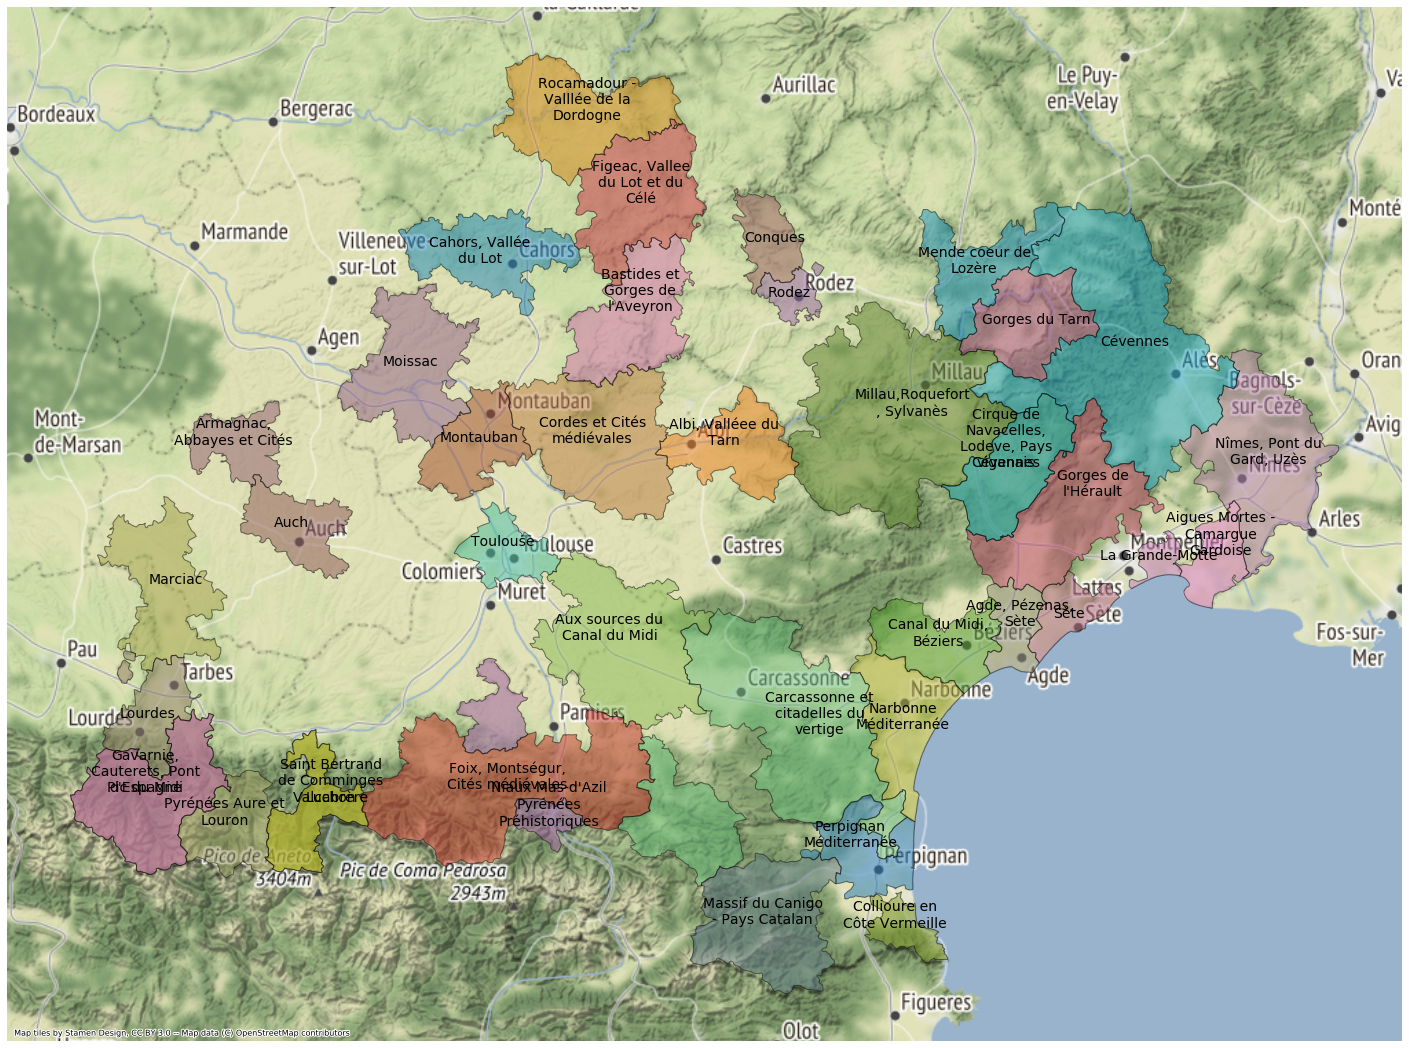

In [6]:
def split_txt(txt):
    return "\n".join(textwrap.wrap(txt, 16))


gdf["gso"] = gdf["gso"].apply(split_txt)
palette = sns.color_palette(None, 40)
cm = LinearSegmentedColormap.from_list("my_cmap_name", palette)
gdf = gdf.to_crs(epsg=3857)
ax = gdf.plot(figsize=(25, 20), alpha=0.5, edgecolor="k", cmap=cm)
ctx.add_basemap(ax)
ax.set_axis_off()
gdf["coords"] = gdf["geometry"].apply(lambda x: x.representative_point().coords[:])
gdf["coords"] = [coords[0] for coords in gdf["coords"]]
for idx, row in gdf.iterrows():
    plt.annotate(s=row["gso"], xy=row["coords"], horizontalalignment="center", size=14)
plt.savefig("grandssites.svg")
plt.savefig("grandssites.png")
plt.show()